# Rotation in 2D

Why would I want to *rotate* my data?
1. To see it better
2. For **data augmentation** (e.g. https://blog.roboflow.com/why-and-how-to-implement-random-rotate-data-augmentation/)

The 2D rotation matrix for rotating a data point by $\theta$ radians is:
$$\begin{pmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta)  \end{pmatrix}$$

Let's figure out *why* this is so.

## A little trigonometry
**soh cah toa**
### The definitions of sin, cos and tan:

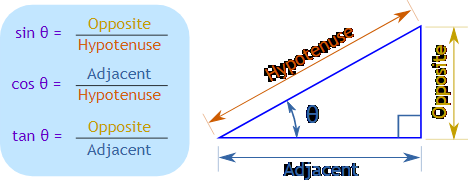

*Image from https://www.mathsisfun.com/sine-cosine-tangent.html*

### Degrees and radians

$\pi$ radians = 180 degrees (see https://www.mathsisfun.com/geometry/radians.html).

### Some trigonometry identities

* $sin(\alpha\pm\beta) = sin(\alpha)cos(\beta) \pm cos(\alpha)sin(\beta)$
* $cos(\alpha\pm\beta) = cos(\alpha)cos(\beta) \mp sin(\alpha)sin(\beta)$ *opposite sign here

(For a picture representation of these, see https://en.wikipedia.org/wiki/List_of_trigonometric_identities.)

## Okay, let's figure it out

Look at this diagram:

<img src="https://articulatedrobotics.xyz/media/assets/posts/transforms/rotations_2d_b.png" alt="drawing" width="200"/>

*From https://articulatedrobotics.xyz/transformations-3-rotation_matrices_2d/*

Our data point is $\begin{pmatrix} x_1 \\ y_1 \end{pmatrix}$ and we want to rotate it to $\begin{pmatrix} x_2 \\ y_2 \end{pmatrix}$.

matrix muliyplicstion

So we need to solve:
$\begin{pmatrix} x_2 \\ y_2 \end{pmatrix} = \begin{pmatrix} a & b \\ c & d \end{pmatrix} \begin{pmatrix} x_1 \\ y_1 \end{pmatrix}$

x1 is adjacent 

### $x_1, y_1$

Now $x_1$ is the "Adjacent" of the green triangle in the diagram, so $x_1 = h * cos(\phi)$.

And $y_1$ is the "Opposite" of the green triangle in the diagram, so $y_1 =  h * sin(\phi)$.

### $x_2, y_2$

Similarly, $x_2$ is the "Adjacent" of the red triangle in the diagram, so it can be written as $x_2 = h * cos(\phi+\theta)$.

And $y_2$ can be written as $y_2 = h * sin(\phi+\theta)$.

* $cos(\alpha\pm\beta) = cos(\alpha)cos(\beta) \mp sin(\alpha)sin(\beta)$ *opposite sign here


### Expanding

Using the trigonometric identities I reminded you about earlier, we can rewrite:
* $x_2 = h*cos(\phi)cos(\theta) - sin(\phi)sin(\theta)$
* $y_2 = h*sin(\phi)cos(\theta) + cos(\phi)sin(\theta)$

### Finishing up

Now we can reverse-matrix-multiply (pull out $x_1$ and $y_1$) and we get:

$\begin{pmatrix}x_2 \\ y_2 \end{pmatrix} = \begin{pmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta)  \end{pmatrix} \begin{pmatrix}x_1 \\ y_1 \end{pmatrix}$


## Let's play with it

And notice you can easily combine it with a scaling transformation!

https://www.cs.usfca.edu/~galles/visualization/RotateScale2D.html

## Okay, now on our car data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
# For today we only care about price and year
data = np.array(np.genfromtxt('data/vehiclesNumeric.csv', delimiter=',', skip_header=1, dtype=int, encoding="utf-8", usecols=[1,2]))  

# let's just keep 100 rows
data = data[100:200, :]
print(data[:5])
# get a pandas dataframe for plotting
df = pd.DataFrame(data, columns=["price", "year"])

[[ 5995  2009]
 [17050  2014]
 [13999  2015]
 [ 8995  2014]
 [ 5995  2007]]


In [4]:
def getSummaryStatistics(data):
    print("min, max, mean, std per variable")
    return pd.DataFrame([data.min(axis=0), data.max(axis=0), data.mean(axis=0), data.std(axis=0)])

def getShapeType(data):
    print("shape")
    return (data.shape, data.dtype)

print(getSummaryStatistics(data))
print(getShapeType(data))

min, max, mean, std per variable
              0            1
0      0.000000  2002.000000
1  29500.000000  2019.000000
2   8464.720000  2012.910000
3   5791.172279     3.627933
shape
((100, 2), dtype('int64'))


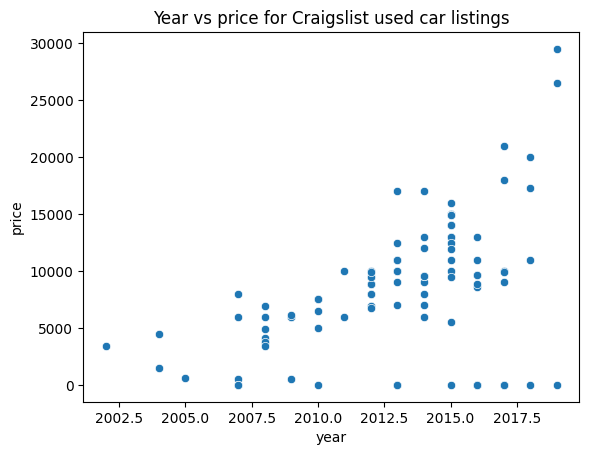

In [5]:
def plot2d(data):
    sns.scatterplot(pd.DataFrame(data[:, [0, 1]], columns=["price", "year"]), x="year", y="price").set(title="Year vs price for Craigslist used car listings")
    
plot2d(data)

transformMatrix
shape
((2, 2), dtype('float64'))
[[-1.8369702e-16  1.0000000e+00]
 [-1.0000000e+00 -1.8369702e-16]] 

after rotating, rotatedData
min, max, mean, std per variable
             0             1
0  2002.000000 -2.950000e+04
1  2019.000000 -3.686799e-13
2  2012.910000 -8.464720e+03
3     3.627933  5.791172e+03
shape
((100, 2), dtype('float64'))


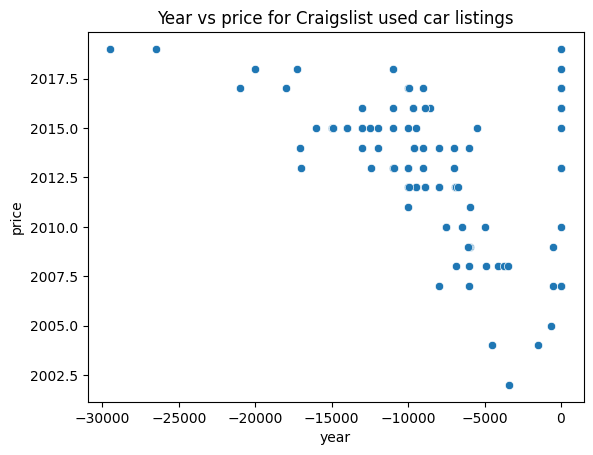

In [7]:
rotateTransform = np.array([np.cos(np.radians(270)), -np.sin(np.radians(270)), np.sin(np.radians(270)), np.cos(np.radians(270))]).reshape(2, 2)
print("transformMatrix")
print(getShapeType(rotateTransform))
print(rotateTransform,"\n")
#100,2=(2*2)*(2,100)=(2,100).T=(100,2)
rotatedData = (rotateTransform@data.T).T 
print("after rotating, rotatedData")
print(getSummaryStatistics(rotatedData))
print(getShapeType(rotatedData))
plot2d(rotatedData)

## Challenges

How would you do two successive rotations?

How would you do - in one step - a rotation, scaling, *and* translation? What would you have to change about the rotation matrix?